<a href="https://colab.research.google.com/github/lim-jr/ESAA/blob/main/%ED%94%8C%EC%A0%9D3_PCA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04 PCA

In [ ]:
#  이상치 처리 후 취합 변수명 X_features_out

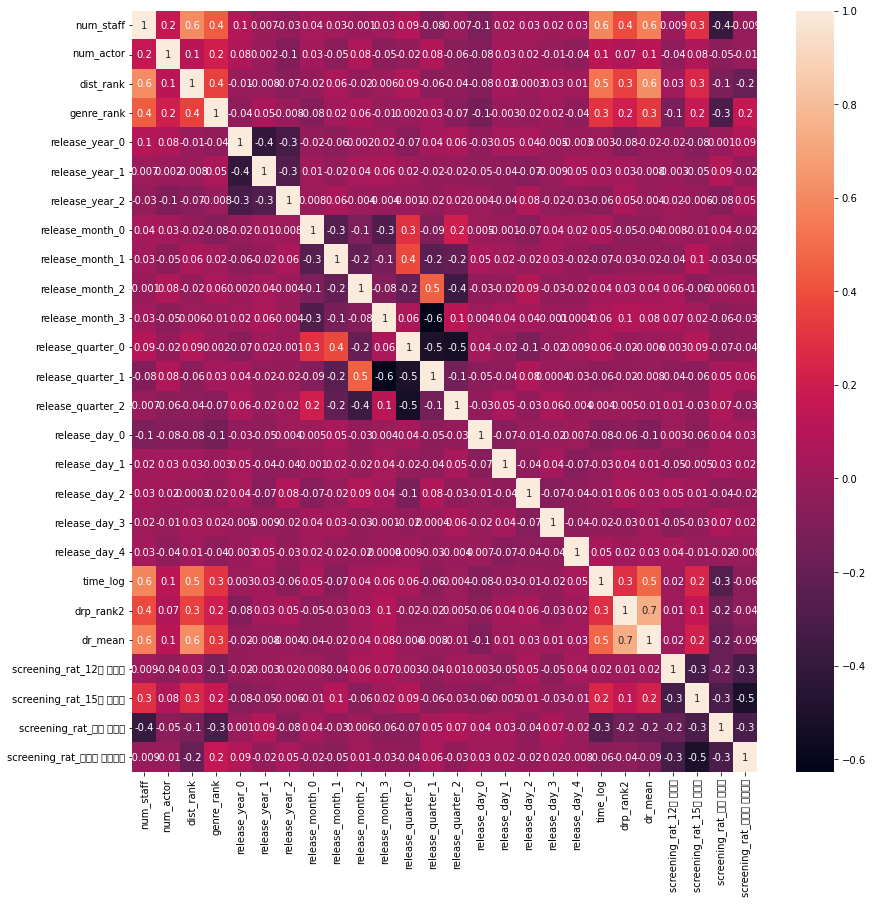

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features_out.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

In [ ]:
train.shape

(600, 27)

* 27개 이내에서 주성분 개수를 정해야

### * 주성분 개수 구하기

In [ ]:
# 상관행렬 이용하기 위해 스케일링
from sklearn.preprocessing import StandardScaler

std_df = StandardScaler().fit_transform(X_features_out)
std_df = pd.DataFrame(std_df, index = X_features_out.index, columns=X_features_out.columns)

# 모든 독립변수개수만큼 주성분 개수 설정해서 분석
from sklearn.decomposition import PCA 

pca = PCA(n_components=26) 
pca_array = pca.fit_transform(std_df)
pca_df = pd.DataFrame(pca_array, index=std_df.index, columns=[f"pca{num+1}" for num in range(std_df.shape[1])])
pca_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,pca26
0,0.245528,0.619707,-1.078959,1.912980,-0.787573,1.183073,-1.030821,-0.666541,1.087974,-0.608343,...,-1.700817,-0.986224,-0.973828,-0.416644,0.655346,-0.679900,0.504054,0.041050,0.042858,1.870971e-17
1,1.867985,0.721083,-1.178112,-0.494652,0.776877,1.024229,1.047063,-1.842683,2.022025,0.740342,...,-0.229230,-0.297003,-0.791845,-0.117148,0.104084,-0.505254,0.205911,0.296583,0.059802,-2.827830e-15
2,3.072107,-1.831408,1.249262,-1.523237,0.697341,1.179280,0.712817,-0.754104,0.963122,-0.810273,...,0.019984,-0.344248,-0.608464,0.067756,-0.057413,-0.512979,-0.876574,0.688741,-0.034511,-4.566790e-16
3,2.222464,-1.212073,0.322397,-1.012616,-2.121261,1.501929,-0.039007,0.567506,-0.694199,1.073977,...,-0.347404,-0.858844,-0.418215,-0.096226,-0.779615,0.205019,-0.657789,-0.457298,-0.288780,2.721591e-15
4,2.913445,-1.998340,1.449953,-1.295486,-1.049260,0.173929,-0.852208,-1.096087,1.197356,0.543627,...,-0.522010,-0.409912,-0.279261,0.166851,-0.687589,0.112324,0.120604,0.655760,-0.036142,9.167830e-16


In [ ]:
# 주성분 설명력과 기여율
result = pd.DataFrame({'고윳값':pca.explained_variance_, 
                       '기여율':pca.explained_variance_ratio_},
                      index=np.array([f"pca{num+1}" for num in range(std_df.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,고윳값,기여율,누적기여율
pca1,3.696418e+00,1.419330e-01,0.141933
pca2,2.237683e+00,8.592129e-02,0.227854
pca3,1.790592e+00,6.875412e-02,0.296608
pca4,1.588821e+00,6.100666e-02,0.357615
pca5,1.511812e+00,5.804969e-02,0.415665
pca6,1.425280e+00,5.472710e-02,0.470392
pca7,1.370387e+00,5.261935e-02,0.523011
pca8,1.350075e+00,5.183942e-02,0.574851
pca9,1.158047e+00,4.446605e-02,0.619317
pca10,1.093017e+00,4.196904e-02,0.661286


* 주성분의 개수 정하는 기준 (OR)
  1. 고윳값이 0.7이상인 주성분
  2. 누적기여율이 0.8 이상이 넘어가지는 지점의 주성분
  3. Scree Plot에서 완만해지는 지점

* 고유값이 0.7 이상일 때 주성분 17개,    
  누적기여율이 0.77->0.8 넘어갈때 주성분 14개이다. 
  공통범위인 14개를 최종 주성분의 개수로 정한다.

***이상치 처리 후 개수 바뀐다.***

### * PCA 처리하기

In [ ]:
# 이제 PCA 변환
from sklearn.decomposition import PCA

pca=PCA(n_components=14) #PCA로 변환할 차원의 수를 의미. 이상치처리후 개수 바꾸기

#fit과 transform 호출해 PCA 변환 데이터 반환
pca.fit(std_df)
movie_pca=pca.transform(std_df)
print(movie_pca.shape)

In [ ]:
# PCA 변환된 데이터의 칼럼 명을 지정.
#pca_columns=['pca_1','pca_2','pca_3','pca_4','pca_5','pca_6','pca_7',
 #            'pca_8','pca_9','pca_10','pca_11','pca_12','pca_13','pca_14']
pca_columns = ['pca_', str(i) for i in range(1,15)] # 이상치 처리후 개수 바꾸기
X_features_pca=pd.DataFrame(movie_pca, columns=pca_columns)
X_features_pca.head(3)

In [ ]:
# pca component 별로 원본 데이터의 변동성을 얼마나 잘 반영하고 있는지
print(pca.explained_variance_ratio_)

* 총 합을 더한값이 변동성을 설명하는 비율

# 05 X_features_pca 로 다시 모델 적합하기